In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
dataset = pd.read_csv("credit_data.csv")
dataset

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [3]:
#creating matrix of features
X = dataset.iloc[:,:-1].values

In [4]:
#creating dependent variable vector
y = dataset.iloc[:, -1].values

In [5]:
#Performing EDA (Exploratory data analysis before major data preprocessing)
#Summary statistics for numerical columns
dataset.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [6]:
#Checking data types and non-nulls count
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
#checking missing values per columns
dataset.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

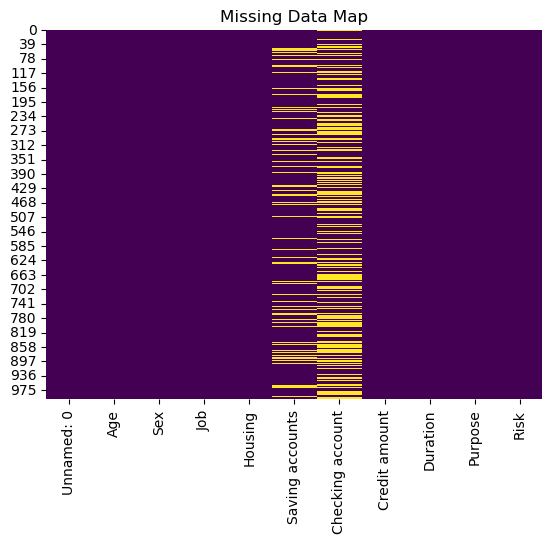

In [8]:
#Missing data heat map
import seaborn as sns
sns.heatmap(dataset.isnull(), cbar = False, cmap="viridis")
plt.title("Missing Data Map")
plt.show()

In [9]:
#taking care of missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imputer.fit(X[:,4:7])
X[:,4:7] = imputer.transform(X[:,4:7])

In [10]:
print(X[:, 4:7])

[['own' 'little' 'little']
 ['own' 'little' 'moderate']
 ['own' 'little' 'little']
 ...
 ['own' 'little' 'little']
 ['free' 'little' 'little']
 ['own' 'moderate' 'moderate']]


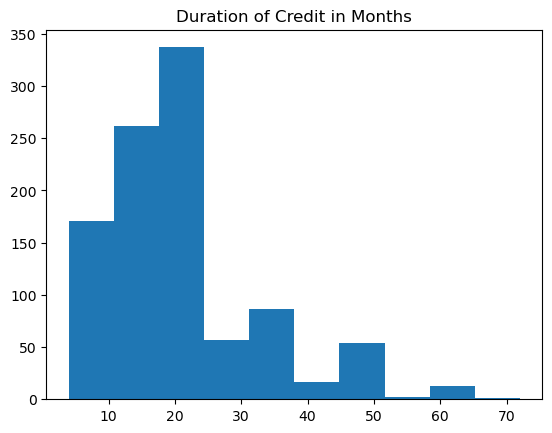

In [11]:
#Checking for outliers and to spot skewness
plt.title("Duration of Credit in Months")
plt.hist(X[:, 8:9])
plt.show()

In [15]:
#Mergin back arrays into a pandas dataframe to work with pandas and seaborn
columns = ['Unnamed', 'Age', 'Sex', 'Job', 'Housing', 'Saving Account','Checking Account', 'Credit Amount','Duration','Purpose']
#convert feature array to dataframe
updated_df = pd.DataFrame(X, columns=columns)

#add target column again

updated_df['Risk'] = y

<Axes: xlabel='Risk', ylabel='Age'>

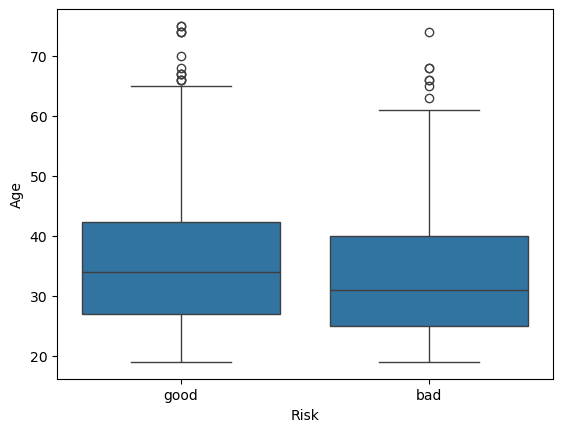

In [17]:
#SHOW DISTRIBUTIONS SPLITTED BY TARGET
sns.boxplot(x='Risk', y='Age', data=updated_df)


<Axes: xlabel='Risk', ylabel='Credit Amount'>

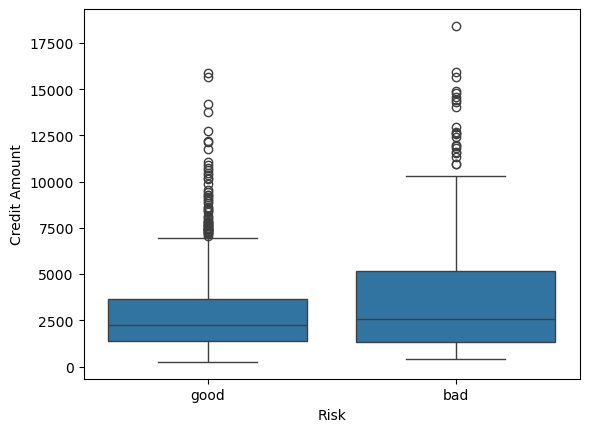

In [20]:
sns.boxplot(x='Risk', y='Credit Amount', data=updated_df)

<Axes: xlabel='Risk', ylabel='Duration'>

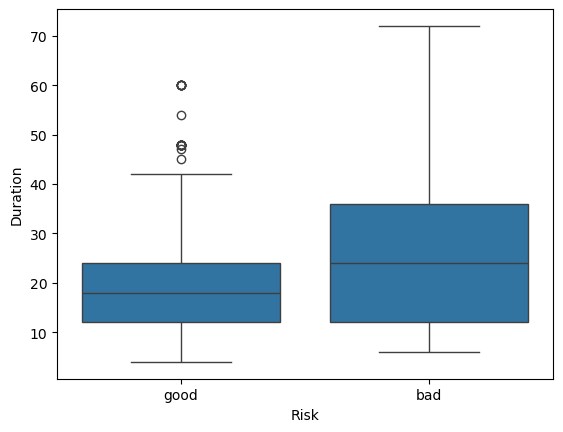

In [21]:
sns.boxplot(x='Risk', y='Duration', data = updated_df)

<Axes: xlabel='Sex', ylabel='count'>

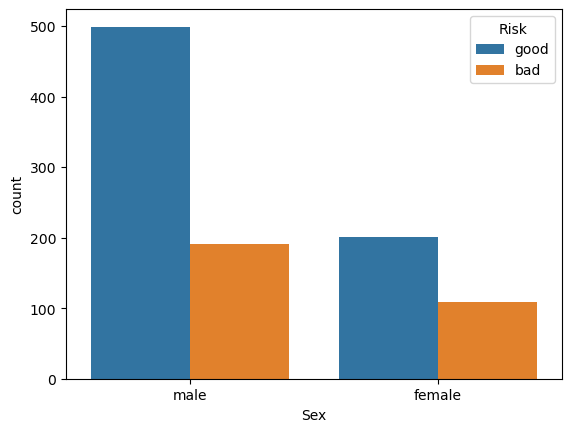

In [26]:
#Using countplots to check relationships of categorical data
sns.countplot(x='Sex', hue='Risk', data = updated_df)

<Axes: xlabel='Checking Account', ylabel='count'>

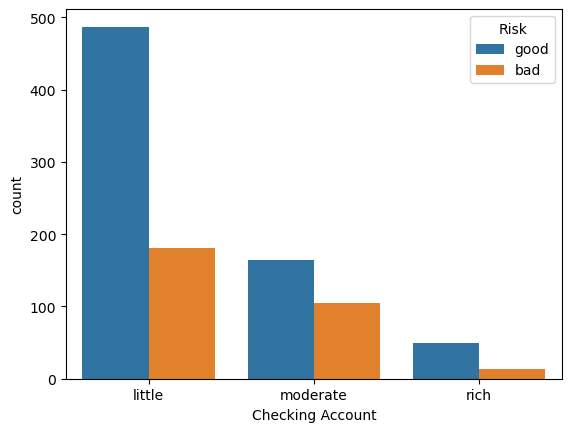

In [27]:
sns.countplot(x='Checking Account', hue='Risk', data=updated_df)

<Axes: xlabel='Saving Account', ylabel='count'>

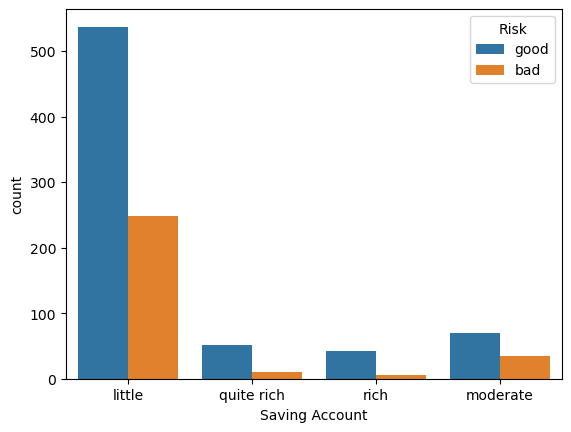

In [28]:
sns.countplot(x='Saving Account', hue='Risk', data=updated_df)

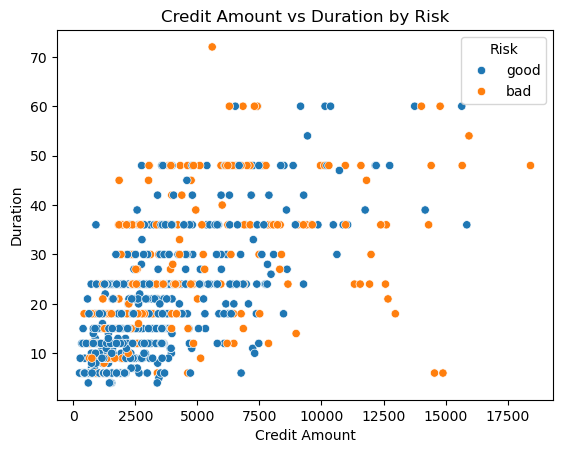

In [22]:
#Comparing credit amount and duration colored by risk
sns.scatterplot(x='Credit Amount', y='Duration', hue='Risk', data=updated_df)
plt.title('Credit Amount vs Duration by Risk')
plt.show()

In [185]:
#One-hot encoding: transforming categorical features for ML algorithms
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [186]:
print(X)

[[0 67 'male' ... 1169 6 'radio/TV']
 [1 22 'female' ... 5951 48 'radio/TV']
 [2 49 'male' ... 2096 12 'education']
 ...
 [997 38 'male' ... 804 12 'radio/TV']
 [998 23 'male' ... 1845 45 'radio/TV']
 [999 27 'male' ... 4576 45 'car']]


In [187]:
#Here I realized that the first column for id was not necessary
X = np.delete(X, 0, axis = 1)
print(X)

[[67 'male' 2 ... 1169 6 'radio/TV']
 [22 'female' 2 ... 5951 48 'radio/TV']
 [49 'male' 1 ... 2096 12 'education']
 ...
 [38 'male' 2 ... 804 12 'radio/TV']
 [23 'male' 2 ... 1845 45 'radio/TV']
 [27 'male' 2 ... 4576 45 'car']]


In [188]:
print(X[:1, :])

[[67 'male' 2 'own' 'little' 'little' 1169 6 'radio/TV']]


In [189]:
categorical_indexes = [1, 3, 4, 5, 8]

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_indexes)], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [190]:
print(X[:1, :])

[[0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0
  0.0 0.0 67 2 1169 6]]


In [191]:
#Encoding the dependent value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y) #1 = good, 0 = bad

In [192]:
print(y)

[1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1
 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0
 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0
 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0
 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 

In [193]:
#splitting data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [194]:
#feature scalling the matrix of features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 20:] = sc.fit_transform(X_train[:, 20:])
X_test[:, 20:] = sc.transform(X_test[:, 20:])

In [195]:
print(X_train[:, :])

[[1.0 0.0 0.0 ... 0.12858226985113047 -0.6977249731610197
  0.09776381333725007]
 [0.0 1.0 0.0 ... 0.12858226985113047 -0.29775187759266386
  -0.7542084161812684]
 [1.0 0.0 0.0 ... 1.6638929546407482 -0.10517223898567776
  0.01256659038539822]
 ...
 [1.0 0.0 0.0 ... -1.406728414938487 0.1372685443263066
  -0.4986167473257129]
 [0.0 1.0 0.0 ... 1.6638929546407482 -0.5026161460545047
  0.26815825924095377]
 [0.0 1.0 0.0 ... 0.12858226985113047 -0.40253254400171823
  -0.2430250784701573]]


In [196]:
print(X_test[:, :])

[[0.0 1.0 0.0 ... 1.6638929546407482 1.313702509250034
  -0.4986167473257129]
 [0.0 1.0 0.0 ... 1.6638929546407482 4.568045482858147 1.290524934663176]
 [0.0 1.0 0.0 ... 0.12858226985113047 -0.16442751240321196
  -0.7542084161812684]
 ...
 [1.0 0.0 0.0 ... 0.12858226985113047 -0.8014217016417045
  -0.7542084161812684]
 [0.0 1.0 0.0 ... 0.12858226985113047 -0.42023686349842054
  -0.2430250784701573]
 [0.0 1.0 0.0 ... 0.12858226985113047 -0.6467798905276518
  -0.7542084161812684]]
